# Unsteady flow around a cylinder ($Re=200$)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import ibmos as ib

## Numerical grid and solver initialization

In [6]:
s1 = ib.stretching(256, 0.033, 0.20, int(0.5/0.033+16), 16, 16, 0.04)
s2 = ib.stretching(128, 0.033, 0.20, int(0.5/0.033+16), 16, 16, 0.04)
x = np.r_[-s2[::-1], s1[1:]]

s = ib.stretching(192, 0.033, 0.20, int(0.5/0.033+16), 16, 16, 0.04)
y = np.r_[-s[::-1], s[1:]]

solver = ib.Solver(x, y, Re=200.0, Co=0.4)

## Immersed boundaries

In [7]:
solver.set_solids(ib.shapes.cylinder("cylinder", 0, 0, 0.5, dsmin))

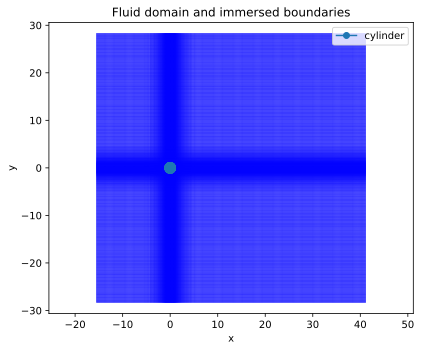

In [9]:
solver.plot_domain(figsize=(6, 5));

## Boundary conditions

In [12]:
uBC, vBC = solver.zero_boundary_conditions()
for k in range(4):
    uBC[k][:] = 1

sBC = ((np.zeros(solver.solids[0].l), np.zeros(solver.solids[0].l)), )

## Unsteady simulation

In [14]:
x, = solver.steps(solver.zero(), uBC, vBC, sBC, int(20/solver.dt), reportEvery=int(1/solver.dt))

  step      t        residual   cylinder(fx) cylinder(fy) 
    75    0.990000 8.747843e-04  1.288422273 -0.000000000 
   150    1.980000 7.029663e-04  1.350604375 -0.000000000 
   225    2.970000 4.666733e-04  1.244030523  0.000000000 
   300    3.960000 3.381529e-04  1.174332975  0.000000000 
   375    4.950000 2.647496e-04  1.126219139 -0.000000000 
   450    5.940000 2.206300e-04  1.090404493  0.000000000 
   525    6.930000 1.905929e-04  1.062100099 -0.000000000 
   600    7.920000 1.681126e-04  1.039114987  0.000000000 
   675    8.910000 1.505447e-04  1.020189460 -0.000000000 
   750    9.900000 1.364678e-04  1.004429073  0.000000000 
   825   10.890000 1.249724e-04  0.991185972 -0.000000000 
   900   11.880000 1.154280e-04  0.979987468  0.000000000 
   975   12.870000 1.073793e-04  0.970478254  0.000000000 
  1050   13.860000 1.004910e-04  0.962371503  0.000000000 
  1125   14.850000 9.452395e-05  0.955384316 -0.000000000 
  1200   15.840000 8.931521e-05  0.949180006 -0.00000000

## Display results

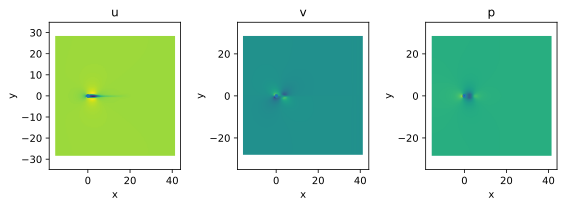

In [19]:
solver.plot_field(x);